## Name: Vineeth Babu Chabala
## Institute: IIITDM Kancheepuram
## Roll No: CS20B1025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import csv file

In [2]:
df = pd.read_csv('books.csv')

Q1: How many rows and columns are there in books.csv dataset?

We can find no of rows and columns in several methods but i am using the below method and also we can use df.shape which gives rows and columns as a tuple 

In [3]:
print("No of rows:",len(df))
print("No of columns:",len(df.columns))

No of rows: 399
No of columns: 24


Q2: How many books do not have an original title?

In [4]:
noTitle = df['original_title'].isnull().sum()
print("No of books do not have original title:",noTitle)

No of books do not have original title: 36


Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

Here i am doing a deep copy of the dataset so that any changes i make in the copy will not affect the original dataset
Then dropping the rows with original title as null
and to count unique books based on book id i have created a dictionary with book ids as dictionary does not allow duplicates length off dictionary is same as unique books

In [5]:
df1 = df.copy(deep=True)
df1 = df1.dropna(subset=['original_title'])
list1 = df1['book_id'].to_list()
uniqueId = {i:list1[i] for i in range(0,len(list1))}
print("No of unique books:",len(uniqueId))

No of unique books: 363


Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [6]:
overallAverageRating = df['average_rating'].mean()
print("Average rating of all the books in the dataset based on average_rating:",overallAverageRating)

Average rating of all the books in the dataset based on average_rating: 3.9837844611528817


Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [7]:
booksPublished = (df['original_publication_year']==2000).sum()
print(" No of books published in year 2000:",booksPublished)

 No of books published in year 2000: 8


Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [8]:
maxRatings = df.loc[df['work_ratings_count'].idxmax()]['original_title']
print(maxRatings)

Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944


Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

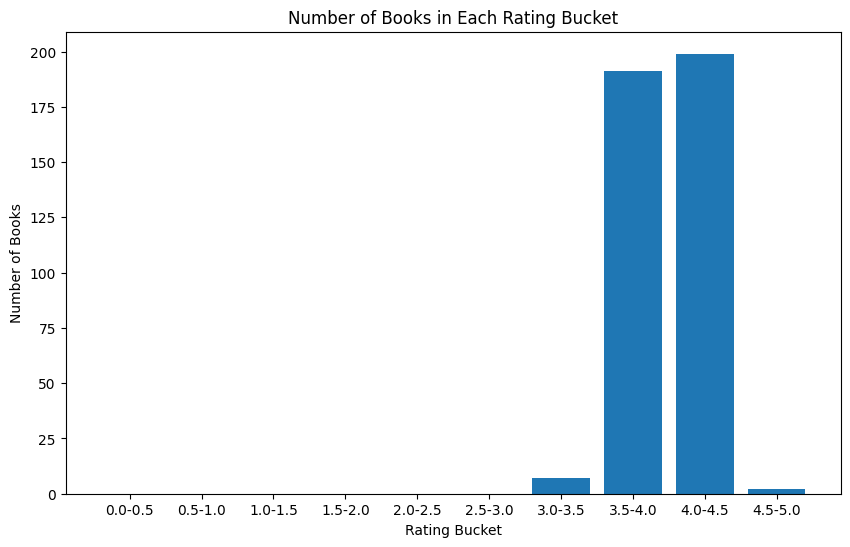

In [9]:
# Create buckets
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = [f'{i:.1f}-{i+0.49:.1f}' for i in bins[:-1]]  # Creating labels for the buckets

# Bucket the average_rating
df['rating_bucket'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True, right=False)

# Count the number of books in each bucket
bucket_counts = df['rating_bucket'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(bucket_counts.index, bucket_counts)
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()